# Dasari Mohan Krishna

# The Spotify Hit Predictor - Project-2

In [1]:
%autosave 10

Autosaving every 10 seconds


# Load Libraries

****Importing required Libraries to built the model****

In [2]:
import numpy as np #numerical computation
from numpy import mean

import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
import seaborn as sns  #Visualization
from sklearn import preprocessing
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

# Load Dataset

**Loading the datasets**

In [3]:
df_00 = pd.read_csv('dataset-of-00s.csv',header=0,index_col=0)
df_10 = pd.read_csv('dataset-of-10s.csv',header=0,index_col=0)
df_60 = pd.read_csv('dataset-of-60s.csv',header=0,index_col=0)
df_70 = pd.read_csv('dataset-of-70s.csv',header=0,index_col=0)
df_80 = pd.read_csv('dataset-of-80s.csv',header=0,index_col=0)
df_90 = pd.read_csv('dataset-of-90s.csv',header=0,index_col=0)

**Concatinating the all datasets**

In [4]:
df = pd.concat([df_00, df_10, df_60, df_70, df_80, df_90])

In [5]:
df.head()

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
track,,,,,,,,,,,,,,,,,,
Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


# Exploring the dataset

**To check if zeros are present in the dataset columns**

In [6]:
df_zero_mask = df == 0

In [7]:
feature_zero_mask = df_zero_mask.iloc[:,:].all(axis=1)
feature_zero_mask

track
Lucky Man                             False
On The Hotline                        False
Clouds Of Dementia                    False
Heavy Metal, Raise Hell!              False
I Got A Feelin'                       False
                                      ...  
(You're A) Go Nowhere                 False
La Fiebre de Norma                    False
Good Times                            False
Inane                                 False
You Can Make History (Young Again)    False
Length: 41106, dtype: bool

In [8]:
sum(feature_zero_mask)

0

In [9]:
df.shape

(41106, 18)

In [10]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599793,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41106 entries, Lucky Man to You Can Make History (Young Again)
Data columns (total 18 columns):
artist              41106 non-null object
uri                 41106 non-null object
danceability        41106 non-null float64
energy              41106 non-null float64
key                 41106 non-null int64
loudness            41106 non-null float64
mode                41106 non-null int64
speechiness         41106 non-null float64
acousticness        41106 non-null float64
instrumentalness    41106 non-null float64
liveness            41106 non-null float64
valence             41106 non-null float64
tempo               41106 non-null float64
duration_ms         41106 non-null int64
time_signature      41106 non-null int64
chorus_hit          41106 non-null float64
sections            41106 non-null int64
target              41106 non-null int64
dtypes: float64(10), int64(6), object(2)
memory usage: 7.2+ MB


In [12]:
# Checking for the null values in dataset
df.isnull().mean()*100

artist              0.0
uri                 0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
chorus_hit          0.0
sections            0.0
target              0.0
dtype: float64

In [13]:
df.columns

Index(['artist', 'uri', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [14]:
features_response = df.columns.tolist()
features_response

['artist',
 'uri',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'chorus_hit',
 'sections',
 'target']

**Finding Correlation between the atrributes**

In [44]:
c = df.corr()
c

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.206128,0.015433,0.274160,-0.032743,0.156452,-0.261252,-0.301915,-0.115251,0.553858,-0.066541,-0.063030,0.191664,-0.036277,-0.058615,0.346097
energy,0.206128,1.000000,0.022523,0.772628,-0.033780,0.122430,-0.715088,-0.208153,0.157779,0.341427,0.224018,0.011830,0.196072,0.009620,-0.040233,0.177142
key,0.015433,0.022523,1.000000,0.008438,-0.140455,0.026515,-0.024178,-0.013101,0.000668,0.007742,0.001154,0.015493,0.004757,0.010264,0.006784,0.009883
loudness,0.274160,0.772628,0.008438,1.000000,0.000509,0.069241,-0.566548,-0.374301,0.086708,0.271775,0.169453,-0.049890,0.165520,-0.013401,-0.080065,0.286034
mode,-0.032743,-0.033780,-0.140455,0.000509,1.000000,-0.059636,0.049961,-0.075992,0.008886,0.035636,0.027053,-0.074828,-0.009483,-0.022594,-0.057095,0.079614
speechiness,0.156452,0.122430,0.026515,0.069241,-0.059636,1.000000,-0.083948,-0.084092,0.131488,0.001528,0.036854,0.007631,0.021085,0.012972,-0.008636,-0.040835
acousticness,-0.261252,-0.715088,-0.024178,-0.566548,0.049961,-0.083948,1.000000,0.204137,-0.030765,-0.195331,-0.179700,-0.070271,-0.188139,-0.012409,-0.016824,-0.246036
instrumentalness,-0.301915,-0.208153,-0.013101,-0.374301,-0.075992,-0.084092,0.204137,1.000000,-0.050582,-0.287047,-0.053618,0.106551,-0.077980,0.048654,0.081188,-0.407638
liveness,-0.115251,0.157779,0.000668,0.086708,0.008886,0.131488,-0.030765,-0.050582,1.000000,0.000784,0.024861,0.005336,0.004773,0.037981,-0.011742,-0.051445
valence,0.553858,0.341427,0.007742,0.271775,0.035636,0.001528,-0.195331,-0.287047,0.000784,1.000000,0.107901,-0.172166,0.155669,-0.059120,-0.133527,0.251147


**Drawing the Heatmap**

Text(0.5, 1.0, "Correlation of dataset Attributes from 00's to 90's")

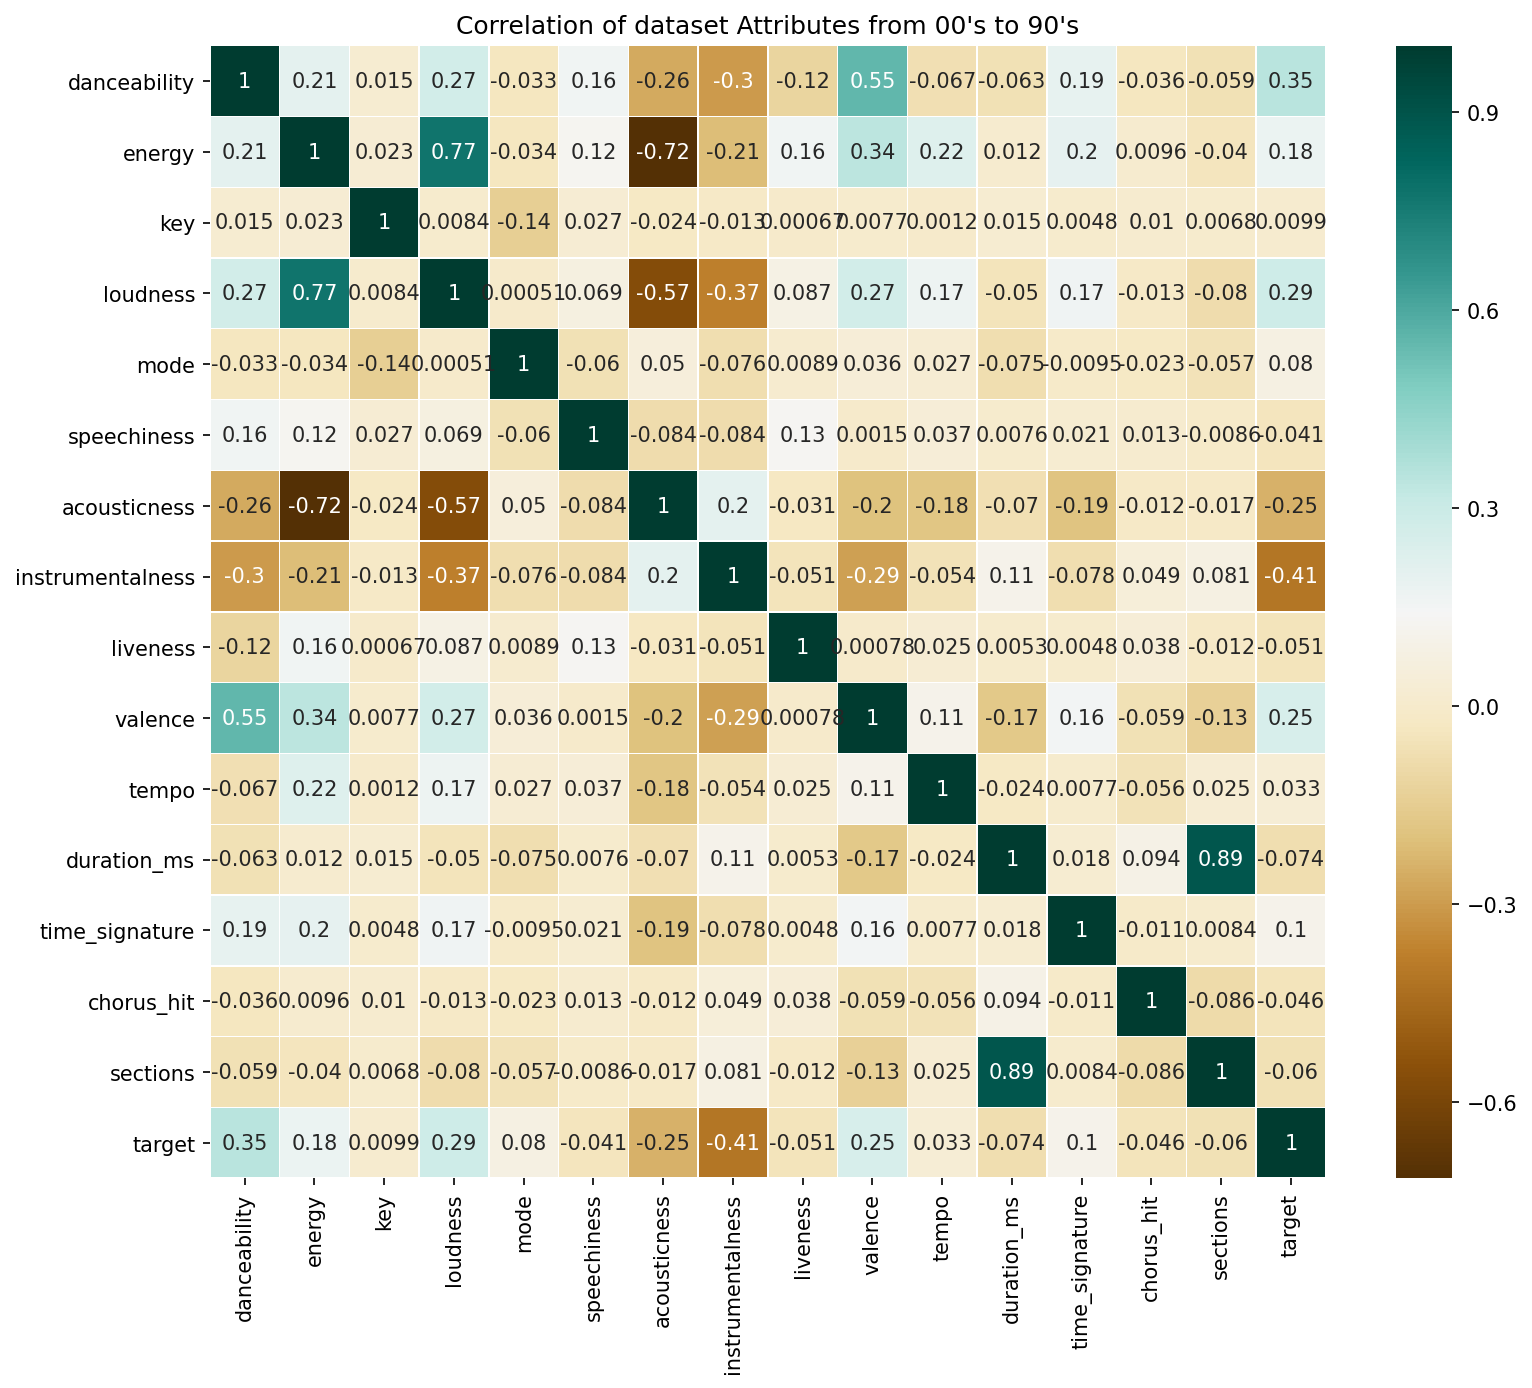

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(c, cmap='BrBG', annot=True, linewidths=0.2)
plt.title("Correlation of dataset Attributes from 00's to 90's")

**From above heatmap,we can observe that music attributes such as danceability, loudness, valence, and energy have impact on the target variable that can decide whether the song is hit or flop**

# Balance The Dataset

**To check whether the target variable is balanced or not**

In [15]:
df.target.value_counts()

1    20553
0    20553
Name: target, dtype: int64

**Here the dataset is balanced with almost same no.of 'hits' and 'flops' , therefore no need to perform any new techniques to transform the dataset**

# Shuffle The Data

In [16]:
df = df.sample(frac=1)
df.head()

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
track,,,,,,,,,,,,,,,,,,
Joy,Teddy Pendergrass,spotify:track:2Qv5EUATFNebcFGq3rN8O6,0.739,0.729,4,-9.694,0,0.0572,0.2490,0.007680,0.069,0.884,103.339,375652,4,31.31730,13,1
The Jolly Green Giant,The Kingsmen,spotify:track:0WhJxcxyQOIK9iaH9GmpKv,0.527,0.615,10,-8.497,1,0.0373,0.6190,0.000000,0.164,0.964,134.809,119171,4,26.99465,8,1
Guerra,7th Poet,spotify:track:5FCp5VLr7kU2hXL64cZFqa,0.665,0.895,4,-7.325,0,0.2530,0.6150,0.000366,0.481,0.676,160.006,266960,4,42.21000,10,0
Chewy Chewy,Ohio Express,spotify:track:1CgEzRUP0Y6XkdOM3CSygW,0.751,0.531,0,-7.109,1,0.0506,0.0667,0.000098,0.173,0.809,121.616,164227,4,21.35679,9,1
Goodbye Time,Blake Shelton,spotify:track:1M9qgq0SaZ5OuAeU0GKXif,0.510,0.348,2,-7.849,1,0.0261,0.2950,0.000025,0.242,0.159,77.041,201733,4,62.27506,10,1


# Standardizing the Inputs

**Removing object type variables**

In [17]:
df.drop(['artist','uri'], axis=1, inplace=True)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
track,,,,,,,,,,,,,,,,
Joy,0.739,0.729,4,-9.694,0,0.0572,0.2490,0.007680,0.069,0.884,103.339,375652,4,31.31730,13,1
The Jolly Green Giant,0.527,0.615,10,-8.497,1,0.0373,0.6190,0.000000,0.164,0.964,134.809,119171,4,26.99465,8,1
Guerra,0.665,0.895,4,-7.325,0,0.2530,0.6150,0.000366,0.481,0.676,160.006,266960,4,42.21000,10,0
Chewy Chewy,0.751,0.531,0,-7.109,1,0.0506,0.0667,0.000098,0.173,0.809,121.616,164227,4,21.35679,9,1
Goodbye Time,0.510,0.348,2,-7.849,1,0.0261,0.2950,0.000025,0.242,0.159,77.041,201733,4,62.27506,10,1


In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [19]:
scaled_inputs = preprocessing.scale(X)
scaled_inputs

array([[ 1.12083345,  0.59160791, -0.34331451, ...,  0.25128465,
        -0.46243672,  0.51815179],
       [-0.07139278,  0.14034663,  1.35402977, ...,  0.25128465,
        -0.68988136, -0.50816477],
       [ 0.70467901,  1.24870765, -0.34331451, ...,  0.25128465,
         0.1107039 , -0.09763814],
       ...,
       [-2.66111061,  0.92807464,  1.63692049, ...,  0.25128465,
         0.08665848, -1.12395471],
       [ 0.42349358, -1.06301676,  0.50535763, ...,  0.25128465,
        -0.02959708,  0.31288848],
       [ 1.4751271 , -0.12882676,  1.07113906, ...,  0.25128465,
         0.02028062,  0.51815179]])

**Splitting the Dataset into Train,Validation and Test**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
scaled_inputs.shape

(41106, 15)

In [22]:
samples_count = scaled_inputs.shape[0]
samples_count

41106

In [23]:
train_count = int(0.8*samples_count)
validation_count = int(0.1*samples_count)
test_count = int(0.1*samples_count)

In [24]:
# Train data
X_train = scaled_inputs[:train_count]
y_train = y[:train_count]

In [25]:
# Validation data
X_val = scaled_inputs[:validation_count]
y_val = y[:validation_count]

In [26]:
# Test data
X_test = scaled_inputs[:test_count]
y_test = y[:test_count]

In [27]:
# Print the no.of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(y_train), train_count, np.sum(y_train) / train_count)
print(np.sum(y_val), validation_count, np.sum(y_val) / validation_count)
print(np.sum(y_test), test_count, np.sum(y_test) / test_count)

target    16476
dtype: int64 32884 target    0.501034
dtype: float64
target    2006
dtype: int64 4110 target    0.488078
dtype: float64
target    2006
dtype: int64 4110 target    0.488078
dtype: float64


# Saving the 3 datasets in *.npz form

In [28]:
np.savez('Spotify_train', inputs = X_train, targets = y_train)
np.savez('Spotify_validation', inputs = X_val, targets = y_val)
np.savez('Spotify_test', inputs = X_test, targets = y_test)

# Creating a Deep Learning Algorithm

In [29]:
# Creating temporary variables to built a model 

npz = np.load('Spotify_train.npz')

# For train set
X_train, y_train = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)


npz = np.load('Spotify_validation.npz')

# For validation set
X_val, y_val = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)


npz = np.load('Spotify_test.npz')

# For test set
X_test, y_test = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

In [30]:
import tensorflow as tf
# Assigning the input and output sizes
input_size = 15 
output_size = 2 

hidden_layer_size = 50 # no.of neurons

model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3rd hidden layer
                             tf.keras.layers.Dense(output_size, activation='softmax')])   # output layer

**Compiling the model**

In [31]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the model**

In [32]:
# Assigning values for the batch size and number of training epochs
batch_size = 400
epochs = 20 

**The maximum no.of epochs increases the accuracy of the model and decreases the loss**

**Fitting the model**

In [33]:
model_fit = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = batch_size, epochs = epochs, verbose = 2)

Train on 32884 samples, validate on 4110 samples
Epoch 1/20
32884/32884 - 2s - loss: 0.5483 - accuracy: 0.7092 - val_loss: 0.5044 - val_accuracy: 0.7453
Epoch 2/20
32884/32884 - 1s - loss: 0.4960 - accuracy: 0.7561 - val_loss: 0.4859 - val_accuracy: 0.7606
Epoch 3/20
32884/32884 - 1s - loss: 0.4840 - accuracy: 0.7640 - val_loss: 0.4774 - val_accuracy: 0.7689
Epoch 4/20
32884/32884 - 1s - loss: 0.4767 - accuracy: 0.7706 - val_loss: 0.4704 - val_accuracy: 0.7713
Epoch 5/20
32884/32884 - 1s - loss: 0.4710 - accuracy: 0.7747 - val_loss: 0.4664 - val_accuracy: 0.7740
Epoch 6/20
32884/32884 - 1s - loss: 0.4671 - accuracy: 0.7773 - val_loss: 0.4671 - val_accuracy: 0.7754
Epoch 7/20
32884/32884 - 1s - loss: 0.4646 - accuracy: 0.7777 - val_loss: 0.4595 - val_accuracy: 0.7827
Epoch 8/20
32884/32884 - 0s - loss: 0.4630 - accuracy: 0.7792 - val_loss: 0.4566 - val_accuracy: 0.7803
Epoch 9/20
32884/32884 - 1s - loss: 0.4589 - accuracy: 0.7826 - val_loss: 0.4550 - val_accuracy: 0.7866
Epoch 10/20
328

# Visualize Neural Network Loss History

In [34]:
# Get training, validation and loss histories
train_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']

In [35]:
# Create count of the number of epochs
number_epoch = range(1, len(train_loss) + 1)
number_epoch

range(1, 21)

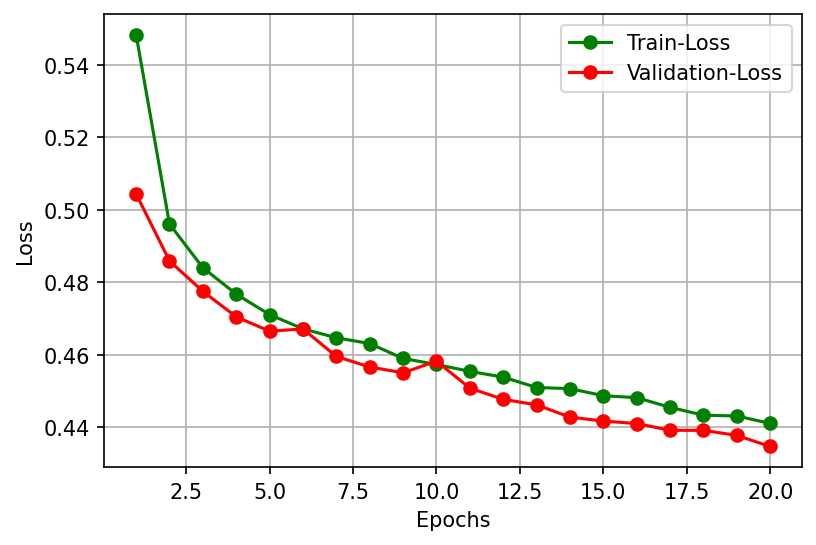

In [36]:
# Visualize loss history
mpl.rcParams['figure.dpi'] = 150
plt.plot(number_epoch, train_loss, 'go-')
plt.plot(number_epoch, validation_loss, 'ro-')

plt.legend(['Train-Loss', 'Validation-Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [37]:
test_loss = model_fit.history['loss']
test_loss

[0.5482923103653446,
 0.4960318965831242,
 0.48396956914098516,
 0.4766851148166269,
 0.47102760296714175,
 0.46710634072060975,
 0.46464121371431516,
 0.46304806166068724,
 0.4589303825229584,
 0.45727614529332083,
 0.45536865488106193,
 0.45377764858014535,
 0.45091483222062156,
 0.4506104609534451,
 0.44865109767593064,
 0.44811333351407284,
 0.4454427627791542,
 0.443266919897995,
 0.44305938139708284,
 0.4410029913790106]

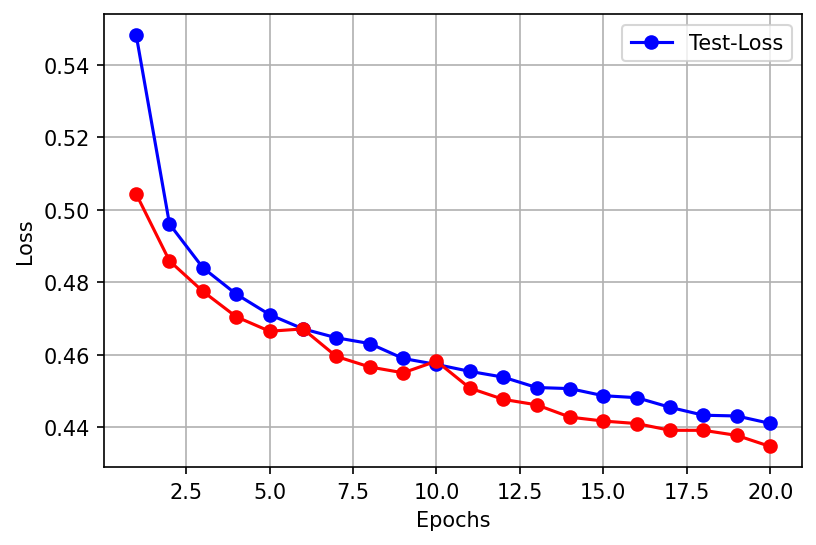

In [38]:
# Visualize loss history
mpl.rcParams['figure.dpi'] = 150
plt.plot(number_epoch, test_loss, 'bo-')
plt.plot(number_epoch, validation_loss, 'ro-')

plt.legend(['Test-Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

**Evaluating the test model**

In [39]:
model.evaluate(X_test, y_test)

4110/4110 [==============================] - 0s 60us/sample - loss: 0.4346 - accuracy: 0.7934


[0.4346374688212309, 0.7934307]

In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

4110/4110 [==============================] - 0s 60us/sample - loss: 0.4346 - accuracy: 0.7934

Test loss: 0.43. Test accuracy: 79.34%


**Evaluating the train model**

In [41]:
model.evaluate(X_train, y_train)

32884/32884 [==============================] - 2s 72us/sample - loss: 0.4357 - accuracy: 0.7946


[0.43574985001531197, 0.79461133]

In [42]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print('\nTrain loss: {0:.2f}. Train accuracy: {1:.2f}%'.format(train_loss, train_accuracy*100))

32884/32884 [==============================] - 2s 59us/sample - loss: 0.4357 - accuracy: 0.7946

Train loss: 0.44. Train accuracy: 79.46%


**Evaluating the Validation model**

In [43]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print('\nValidation loss: {0:.2f}. Validation Accuracy: {1:.2f}%'.format(val_loss, val_accuracy*100))

4110/4110 [==============================] - 0s 61us/sample - loss: 0.4346 - accuracy: 0.7934

Validation loss: 0.43. Validation Accuracy: 79.34%


**From above evaluation of train, validation and test sets, we can observe that all set have accuracy of 79 %  which is considered to be good model performance**